<a href="https://colab.research.google.com/github/HilbertN/Tarea1/blob/main/Tarea2_Inferencia_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import sympy as sp

In [4]:

#Para leer datos desde Google Drive: 
from google.colab import drive 
drive.mount('/content/drive') 
#Leemos archivos con nuestra Data Set 
calificaciones=pd.read_csv('/content/drive/My Drive/Base de datos/calificaciones.csv')
#Instalación de paquetería bioinfokit
!pip install bioinfokit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=ac8987158093a278950976e71d7f6f5199929fefd997f61a02330c93da50ae7f
  Stored in directory: /root/.cache/pip/wheels/c9/ab/ed/8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
Successfully built bioinfokit


# Problema 1:

Los siguientes datos

In [5]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [29]:
from scipy.stats import cosine
def d(a,b):
  h=cosine.rvs(loc=b , scale=a ,size=1000) 
  return h 





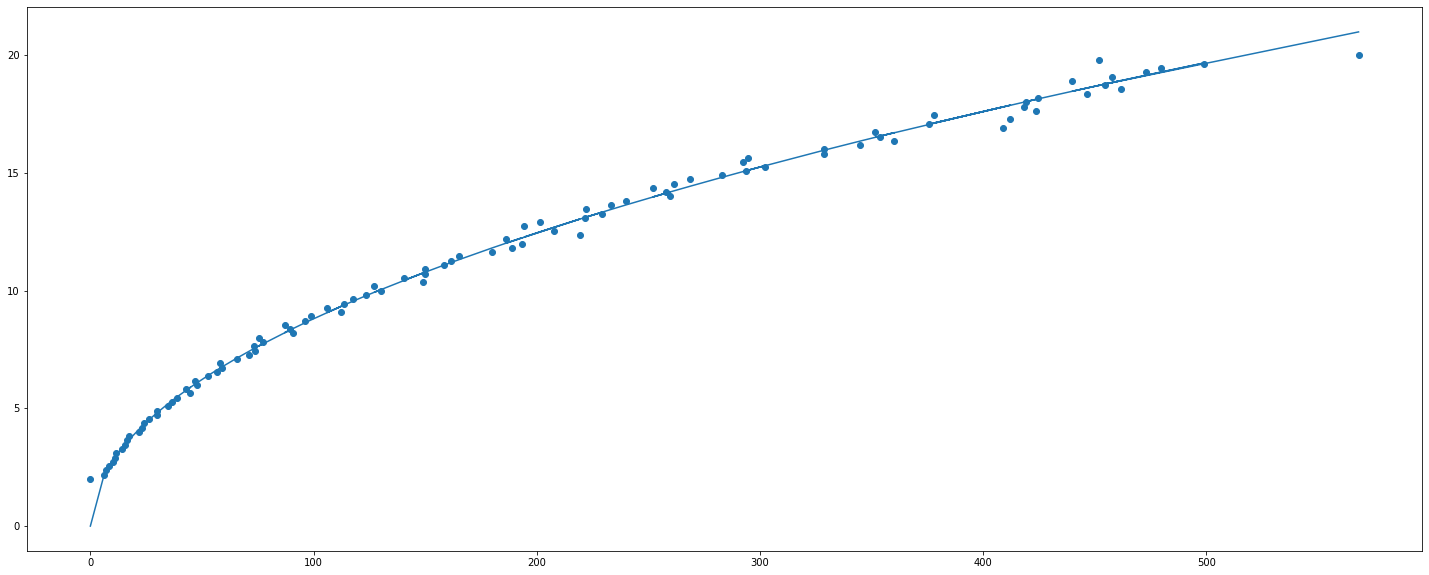

In [30]:
import matplotlib.pyplot as plt
from scipy import optimize

#Vamos a estimar el parámetro a(mantenemos fijo b=1)
a=np.linspace(2,20,100)
v=np.empty(len(a))
for i in range(1,len(a)): 
  x=d(a[i],1)
  v[i]=np.var(x)

def g(x,a): 
  return a*np.sqrt(x) 

alpha,cov = optimize.curve_fit(g, xdata = v, ydata = a)
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(v,a)
plt.plot(v,g(v,alpha[0]))
plt.show()


In [28]:
#Calculamos la varianza de la muestra que se nos proporciona al principio del ejercicio
var=np.var(x)
#Estimamos el parámetro con el ajuste de curva 
g(var,alpha[0])

20.025414835745725

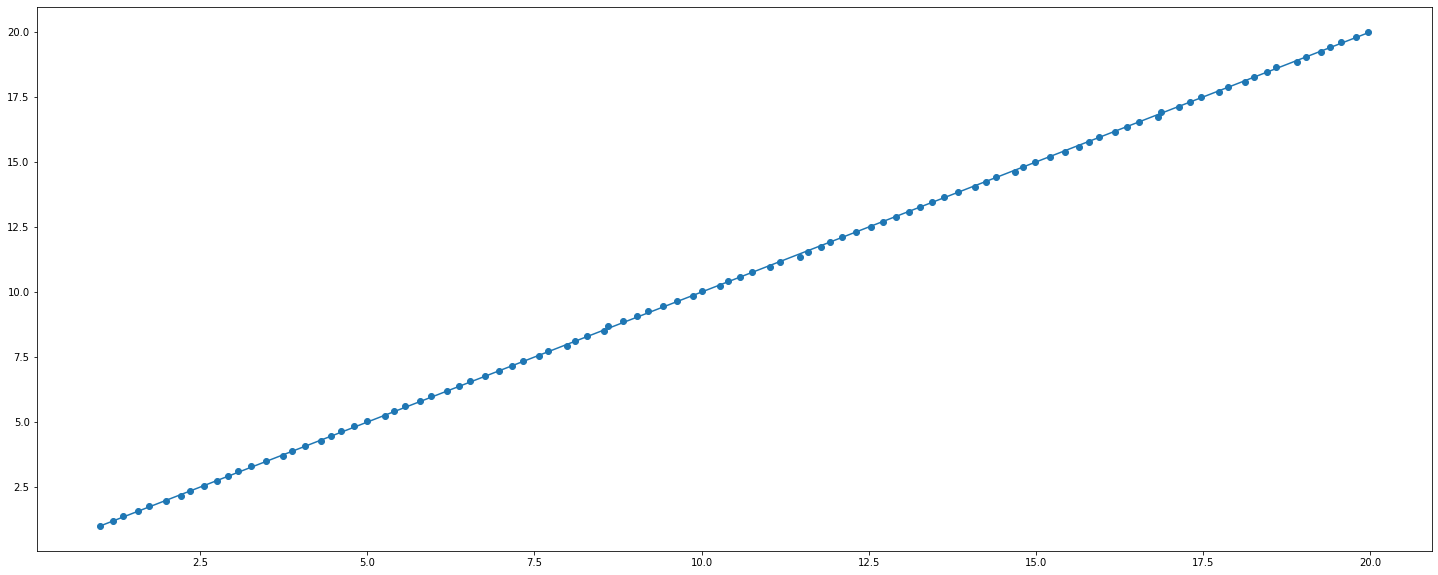

In [39]:
#Vamos seguir un procedimiento análogo para estimar el parámetro b (mantenemos fijo a=1)
b=np.linspace(1,20,100)
m=np.empty(len(b))
for i in range(1,len(b)): 
  x=d(1,b[i])
  m[i]=np.mean(x)

def g(x,a,b): 
  return a+b*x

alpha,cov = optimize.curve_fit(g, xdata = m, ydata = b)
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(m,b)
plt.plot(m,g(m,alpha[0],alpha[1]))
plt.show()

In [40]:
#Calculamos la media de la muestra que se nos proporciona al principio del ejercicio
media=np.mean(x)
#Estimamos el parámetro con el ajuste de curva 
g(media,alpha[0],alpha[1])

19.9672312241983

# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [ ]:
def bootstrap_remuestreo(data, func):
    
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def est_remuestreo(data, func, size=1):
    
    bs_estimaciones= np.empty(size)
    
    for i in range(size):
        bs_estimaciones[i] = bootstrap_remuestreo(data,func)

    return bs_estimaciones

bs_estimaciones = est_remuestreo(x, np.mean, size=10000)
media_muestral=np.mean(bs_estimaciones)
conf_int = np.percentile(bs_estimaciones,[2.5, 97.5])
print('La estimacion del primer momento es:',media_muestral)
print('El intervalo de confianza del 95% =', conf_int)

La estimacion del primer momento es: 2.1318889978722995
El intervalo de confianza del 95% = [1.80524535 2.46197316]


# Problema 3:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

# Problema 4:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótsis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv